In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import functions 

import pandas as pd
import seaborn as sns
from matplotlib import cm

sns.set_style("whitegrid")

plt.rcParams.update({'font.size': 14})
cmap = cm.get_cmap('tab20c')
y1_color = cmap(1/20) #bleu 
y2_color = cmap(6/20) #orange
y3_color = cmap(9/20) #vert
y4_color = cmap(14/20) #violet
#palette = ["cornflowerblue",y2_color,"lightpink"] 
palette = [y1_color,y2_color,y3_color,y4_color]

/var/folders/wb/j_66l1b92d580qv2dsc3kpmr0000gp/T/ipykernel_64565/973204613.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


In [2]:

################################################
############ Marginal
################################################

def plot_resultats_(resultats,alpha,dataset):
    sns.set_style("whitegrid") 
    ############ Coverage:
    plt.figure(figsize=(4,6))
    g =sns.catplot( 
        data=resultats,  kind="bar",
        x="Method", y="Coverage", hue="Method", palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
    )   
    g.refline(y=alpha, color='black',linestyle="dashed",linewidth=2)
    plt.ylim(0,1)
    sns.despine(trim=True, left=True)
    plt.savefig("Figures/Classif_coverage_{}.pdf".format(dataset), format="pdf",bbox_inches="tight")
    plt.show()
    ############ Efficiency:
    plt.figure(figsize=(4,6))
    g =sns.catplot( 
        data=resultats,  kind="bar",
        x="Method", y="Efficiency", hue="Method", palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
    )   
    plt.ylabel("Size") 
    sns.despine(trim=True, left=True)
    plt.savefig("Figures/Classif_efficiency_{}.pdf".format(dataset), format="pdf",bbox_inches="tight") 
    ############ Informativeness:
    plt.figure(figsize=(4,6))
    g =sns.catplot( 
        data=resultats,  kind="bar",
        x="Method", y="Informativeness", hue="Method", palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
    )   
    plt.ylabel("Informativeness") 
    sns.despine(trim=True, left=True)
    plt.savefig("Figures/Classif_informativeness_{}.pdf".format(dataset), format="pdf",bbox_inches="tight")


################################################
############ Conditional (wrt label)
################################################

def plot_resultats_condit_to_y_(resultats_condit_to_y,alpha,dataset):
    sns.set(font_scale=1.5, style="whitegrid" )
    ############ Coverage:
    nb_ = len(np.unique(resultats_condit_to_y["Label"]))
    plt.figure()
    g =sns.catplot( 
        data=resultats_condit_to_y,  kind="bar",
        x="Label", y="Coverage", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
    )   
    g.refline(y=alpha, color='black',linestyle="dashed",linewidth=2)
    sns.move_legend(g,ncol=4, loc= "upper center",bbox_to_anchor=(0.5,1.15))
    plt.ylabel("Coverage") 
    plt.ylim(0.5,1)
    plt.savefig("Figures/Classif_cond_to_y_Coverage_{}.pdf".format(dataset), format="pdf",bbox_inches="tight")
    plt.show()
    ############ Efficiency:
    plt.figure()
    g = sns.catplot( 
        data=resultats_condit_to_y,  kind="bar",
        x="Label", y="Efficiency", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
    )   
    sns.move_legend(g,ncol=4, loc= "upper center",bbox_to_anchor=(0.5,1.15))
    plt.ylabel("Size") 
    plt.savefig("Figures/Classif_cond_to_y_Efficiency_{}.pdf".format(dataset), format="pdf",bbox_inches="tight")
    plt.show()
    ############ Informativeness:
    plt.figure()
    g = sns.catplot( 
        data=resultats_condit_to_y,  kind="bar",
        x="Label", y="Informativeness", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
    )   
    sns.move_legend(g,ncol=4, loc= "upper center",bbox_to_anchor=(0.5,1.15))
    plt.ylabel("Informativeness") 
    plt.savefig("Figures/Classif_cond_to_y_Informativeness_{}.pdf".format(dataset), format="pdf",bbox_inches="tight")
    plt.show()
    


# Simulated data

/var/folders/wb/j_66l1b92d580qv2dsc3kpmr0000gp/T/ipykernel_64565/3427002683.py:24: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x="X1", y="X2",hue="labels",palette=palette)


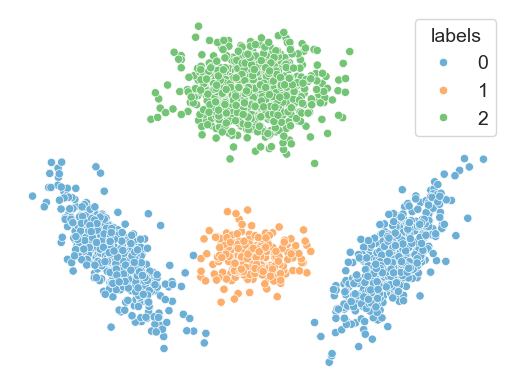

In [3]:
def sample_XY(n = 800):
    S1 = np.array([[4,-3],[-3,4]])
    S2 = np.array([[4,3],[3,4]])
    S3 = np.array([[3,0],[0,1]])
    nu1,nu2,nu3,nu4 = int(n*2/8),int(n*2/8),int(n*1/8),int(n*3/8)
    Y1 = np.random.multivariate_normal([-10,0],S1,nu1)
    Y2 = np.random.multivariate_normal([10,0],S2,nu2)
    Y3 = np.random.multivariate_normal([0,0],S3,nu3)
    Y4 = np.random.multivariate_normal([0,10],2*S3,nu4)
    X  = np.concatenate([Y1,Y2,Y3,Y4])
    
    Y = np.concatenate([ np.repeat(0,Y1.shape[0]),np.repeat(0,Y2.shape[0]), np.repeat(1,Y3.shape[0]), np.repeat(2,Y4.shape[0]) ])
    idx = np.arange(len(X)) 
    np.random.shuffle(idx) 
    X = X[idx] 
    Y = Y[idx] 
    return(X,Y) 

X,Y = sample_XY(n=2000)

sns.set_style("white")
df = pd.DataFrame(X,columns=["X1","X2"]) 
df["labels"] = Y 
sns.scatterplot(data=df, x="X1", y="X2",hue="labels",palette=palette) 
plt.axis("off")  
plt.savefig("Figures/Classif_SimuData.pdf", format="pdf",bbox_inches="tight") 

In [4]:
from arc import coverage 
def get_metrics_withWSC(predictions,y,X):
    MarginalCoverage = np.mean([y[i] in predictions[i] for i in range(len(y))])
    Efficiency = np.mean([len(predictions[i]) for i in range(len(y))]) # size of prediction set 
    Informativeness = np.mean([1*(len(predictions[i]) == 1) for i in range(len(y))]) # proportion of singletons
    wsc_coverage = coverage.wsc_unbiased(X, y, predictions,verbose=False,delta=0.15,M=300) # verbose = True to show bar indicating time left for computation
    return(MarginalCoverage, Efficiency, Informativeness,wsc_coverage) 

def TestAllMetrics_with_WSC(X_test,y_test,clf,calib_parameters,K):
    ''' Test all methods on X_test,y_test '''
    try:
        pi_test = clf.predict_proba(X_test)
    except:
        pi_test = clf.predict(X_test)

    L,Q1,Q2,method_sc = calib_parameters
    # OTCP
    Quantile_Treshold,mu,psi,range_BarY = L[0],L[1],L[2],L[5]
    Prediction_Set = functions.func_prediction_set(pi_test,range_BarY,Quantile_Treshold,mu,psi) 
    res_OTCP  = get_metrics_withWSC(Prediction_Set,y_test,X_test) 
    # IP and MS 
    Prediction_Set_IP,Prediction_Set_MS = functions.evaluate_IP_MS_scores(pi_test,Q1,Q2,K)
    res_IP = get_metrics_withWSC(Prediction_Set_IP,y_test,X_test) 
    res_MS = get_metrics_withWSC(Prediction_Set_MS,y_test,X_test)
    # APS 
    Prediction_Set_ARS = method_sc.predict(X_test)
    res_APS = get_metrics_withWSC(Prediction_Set_ARS, y_test,X_test)
    return(res_OTCP,res_IP,res_MS, res_APS)

In [5]:
np.random.seed(62)
#### REPEAT EXPERIMENTS 
alpha = 0.9 
clf = QuadraticDiscriminantAnalysis()
N = 10 # number of repeated experiments 
resultats = []
resultats_condit_to_y = []
for rep in range(N):
    print(rep)
    X,Y = sample_XY(n=3000)
    K = len(np.unique(Y))

    # SPLIT TRAIN / CALIB / TEST 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
    X_test, X_cal, y_test, y_cal = train_test_split(X_test, y_test, test_size=0.5)

    # LEARN CLASSIFIER AND GET SCORES FOR CALIBRATION DATA 
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

    calib_parameters = functions.CalibAllMetrics(X_cal,y_cal,clf, alpha,K)
    res_OTCP,res_IP,res_MS, res_APS = TestAllMetrics_with_WSC(X_test,y_test,clf,calib_parameters,K)
    resultats.append( np.array(res_OTCP).tolist()+["OTCP"] )
    resultats.append( np.array(res_IP).tolist()+["IP"] )
    resultats.append( np.array(res_MS).tolist()+["MS"] )
    resultats.append( np.array(res_APS).tolist()+["APS"] )

    for y in range(K):
        X_test_y = X_test[y_test==y]
        y_test_y = y_test[y_test==y]
        res_OTCP,res_IP,res_MS, res_APS = TestAllMetrics_with_WSC(X_test_y,y_test_y,clf,calib_parameters,K)
        resultats_condit_to_y.append( np.array(res_OTCP).tolist()+["OTCP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_IP).tolist()+["IP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_MS).tolist()+["MS"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_APS).tolist()+["APS"]+["{}".format(y)] )

resultats = pd.DataFrame(resultats,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method"]) 
resultats_condit_to_y = pd.DataFrame(resultats_condit_to_y,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method","Label"]) 


0
0.96
1
0.9653333333333334
2
0.9653333333333334
3
0.968
4
0.972
5
0.9706666666666667
6
0.9573333333333334
7
0.964
8
0.9706666666666667
9
0.956


<Figure size 640x480 with 0 Axes>

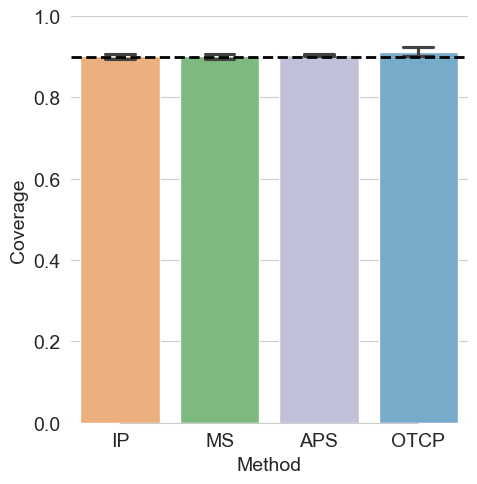

<Figure size 640x480 with 0 Axes>

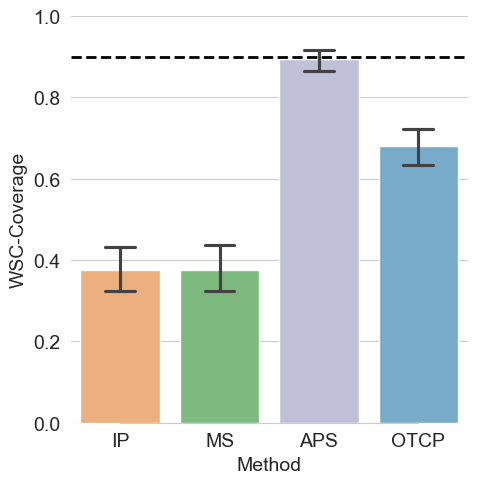

<Figure size 640x480 with 0 Axes>

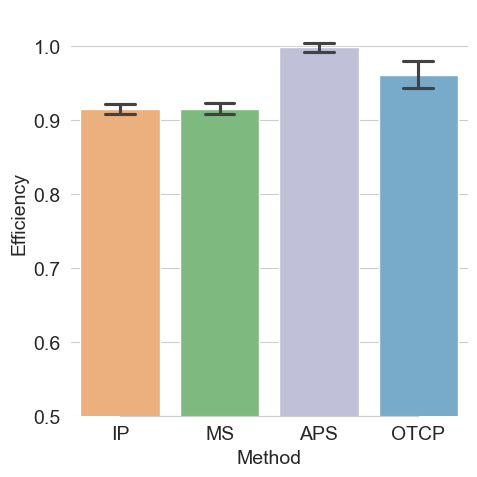

<Figure size 640x480 with 0 Axes>

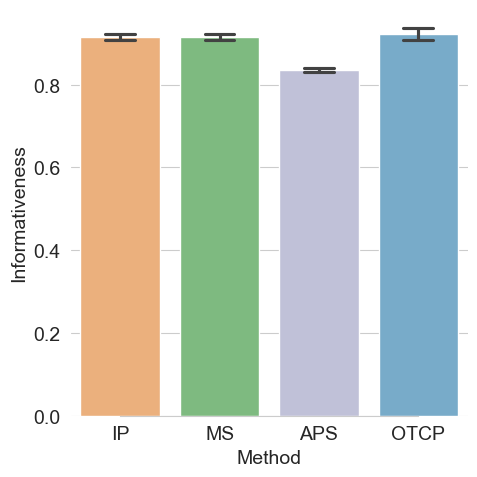

In [6]:
sns.set_style("whitegrid") 

plt.figure()
g =sns.catplot( 
    data=resultats,  kind="bar",
    x="Method", y="Coverage", hue="Method", palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
)   
g.refline(y=alpha, color='black',linestyle="dashed",linewidth=2)
plt.ylim(0,1)
sns.despine(trim=True, left=True)
plt.savefig("Figures/Classif_SimuData_coverage.pdf", format="pdf",bbox_inches="tight")
plt.show()

plt.figure()
g =sns.catplot( 
    data=resultats,  kind="bar",
    x="Method", y="WSC-Coverage", hue="Method", palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
)   
g.refline(y=alpha, color='black',linestyle="dashed",linewidth=2)
plt.ylim(0,1)
sns.despine(trim=True, left=True)
#plt.savefig("Figures/Classif_SimuData_WSCcoverage.pdf", format="pdf",bbox_inches="tight")
plt.show()

plt.figure()
g =sns.catplot( 
    data=resultats,  kind="bar",
    x="Method", y="Efficiency", hue="Method", palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
)   
plt.ylabel("Efficiency") 
plt.ylim(0.5,1.05)
sns.despine(trim=True, left=True)
plt.savefig("Figures/Classif_SimuData_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()

plt.figure()
g =sns.catplot( 
    data=resultats,  kind="bar",
    x="Method", y="Informativeness", hue="Method", 
    palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
)   
plt.ylabel("Informativeness") 
sns.despine(trim=True, left=True)
plt.savefig("Figures/Classif_SimuData_informativeness.pdf", format="pdf",bbox_inches="tight")
plt.show()

# Real data 

In [8]:
from keras.datasets import mnist,fashion_mnist
from sklearn.ensemble import RandomForestClassifier

In the next cell, it suffices to change the parameter `dataset` to run codes on mnist or fashion mnist 

(60000, 28, 28)


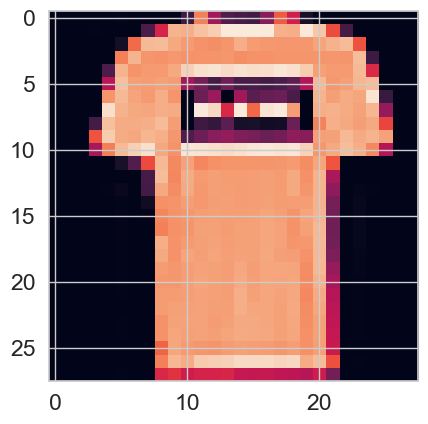

In [ ]:
dataset = "fashion" # "fashion" or "mnist"

if dataset == "mnist":
    (images, labels), (test_X, test_y) = mnist.load_data()
if dataset == "fashion":
    (images, labels), (test_X, test_y) = fashion_mnist.load_data()

K = 10
to_keep = np.arange(K) 
images = np.concatenate([images[labels==i] for i in to_keep])
labels = np.concatenate([np.repeat(j,len(labels[labels==i])) for j,i in enumerate(to_keep)]) # keep labels and rename them between 0 and K 

print(images.shape)
plt.imshow(images[labels==0][0])

In [14]:
n = 25000  # Number of data samples 
if 1==1:
    indices = np.random.choice(len(images),n)
    X, Y = images[indices].reshape(n,images.shape[1]*images.shape[2]), labels[indices]
    K = len(np.unique(Y))
    # SPLIT TRAIN / CALIB / TEST 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9)
    X_test, X_cal, y_test, y_cal = train_test_split(X_test, y_test, test_size=0.5)
X_train.shape,X_test.shape,X_cal.shape 

((2500, 784), (11250, 784), (11250, 784))

In [15]:
np.random.seed(62)

#### REPEAT EXPERIMENTS 
alpha = 0.9 

N = 5
resultats = []
resultats_condit_to_y = []
for rep in range(N):
    print(rep)
    n = 25000  # Number of data samples   # Number of data samples 
    #np.random.seed(rep) ### FOR REPRODUCIBLE RESULTS 
    indices = np.random.choice(len(images),n)
    X, Y = images[indices].reshape(n,images.shape[1]*images.shape[2]), labels[indices]
    K = len(np.unique(Y))
    # SPLIT TRAIN / CALIB / TEST 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9)
    X_test, X_cal, y_test, y_cal = train_test_split(X_test, y_test, test_size=0.5)
    y_test, y_cal = y_test.flatten(), y_cal.flatten()

    # LEARN CLASSIFIER AND GET SCORES FOR CALIBRATION DATA 
    clf = RandomForestClassifier() 
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

    # APPLY ALL METHODS 
    calib_parameters = functions.CalibAllMetrics(X_cal,y_cal,clf, alpha,K)
    res_OTCP,res_IP,res_MS, res_APS = functions.TestAllMetrics(X_test,y_test,clf,calib_parameters,K)
    
    resultats.append( np.array(res_OTCP).tolist()+["OTCP"] )
    resultats.append( np.array(res_IP).tolist()+["IP"] )
    resultats.append( np.array(res_MS).tolist()+["MS"] )
    resultats.append( np.array(res_APS).tolist()+["APS"] )
    K = len(np.unique(y_test))
    for y in range(K):
        X_test_y = X_test[y_test==y]
        y_test_y = y_test[y_test==y]
        res_OTCP,res_IP,res_MS, res_APS = functions.TestAllMetrics(X_test_y,y_test_y,clf,calib_parameters,K)
        resultats_condit_to_y.append( np.array(res_OTCP).tolist()+["OTCP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_IP).tolist()+["IP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_MS).tolist()+["MS"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_APS).tolist()+["APS"]+["{}".format(y)] )

resultats = pd.DataFrame(resultats,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method"]) 
resultats_condit_to_y = pd.DataFrame(resultats_condit_to_y,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method","Label"])

# We save the results 
resultats.to_csv('csv/classif_{}_resultatsK10.csv'.format(dataset), index=False)
resultats_condit_to_y.to_csv('csv/classif_{}_condit_y_resultatsK10.csv'.format(dataset), index=False)

0
0.8388444444444444
1
0.8416
2
0.8389333333333333
3
0.8451555555555555
4
0.8354666666666667


<Figure size 400x600 with 0 Axes>

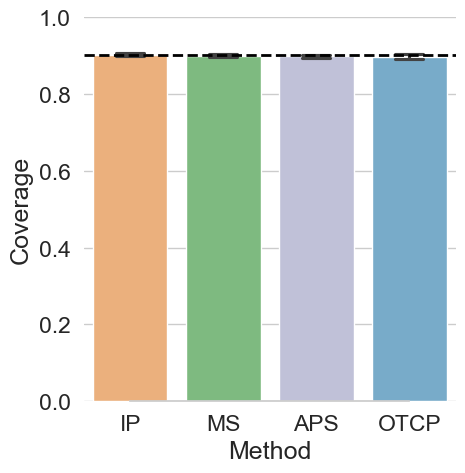

<Figure size 400x600 with 0 Axes>

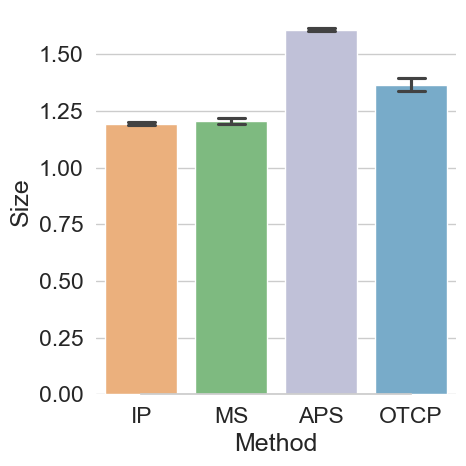

<Figure size 400x600 with 0 Axes>

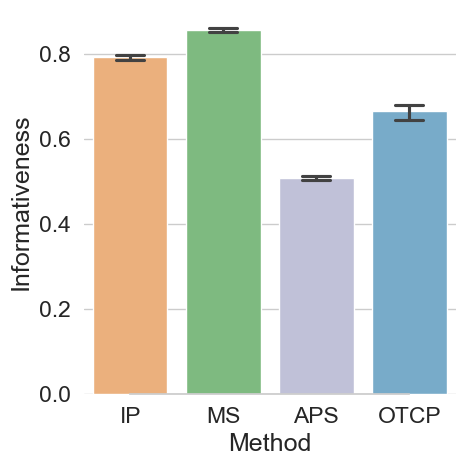

<Figure size 640x480 with 0 Axes>

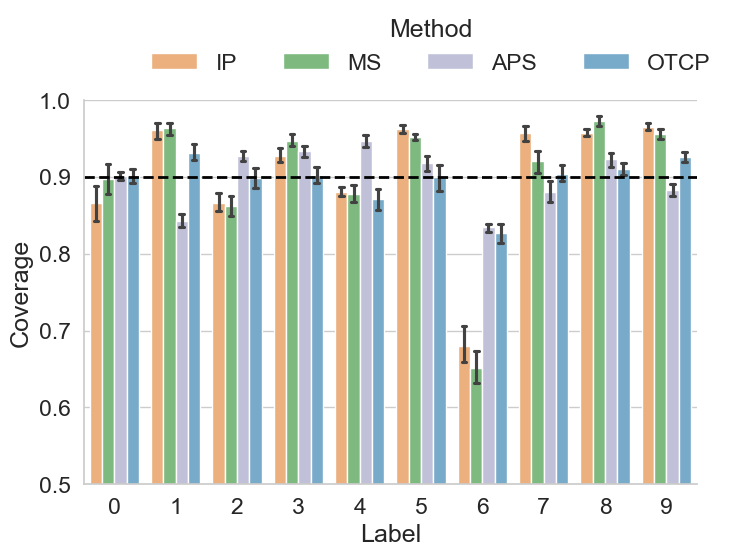

<Figure size 640x480 with 0 Axes>

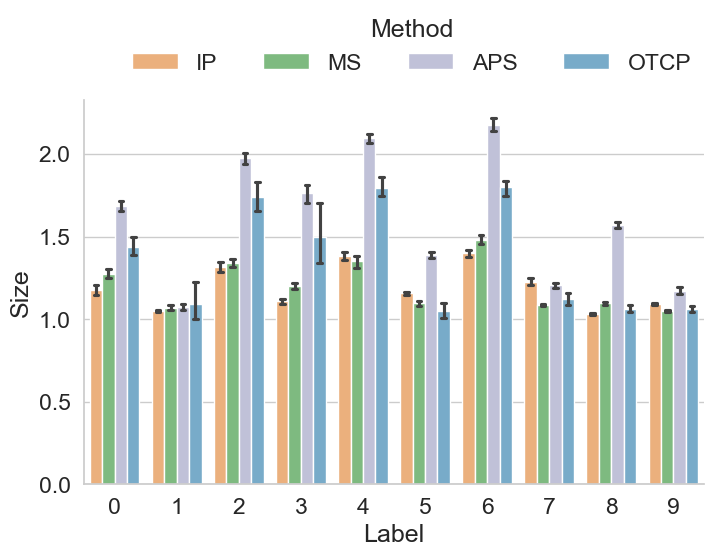

<Figure size 640x480 with 0 Axes>

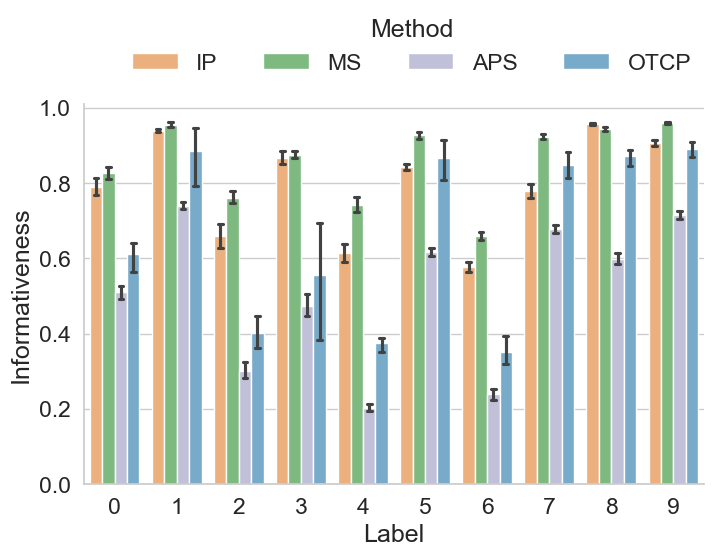

In [16]:
plot_resultats_(resultats,alpha,dataset) 

plot_resultats_condit_to_y_(resultats_condit_to_y,alpha,dataset)  

<Figure size 640x480 with 0 Axes>

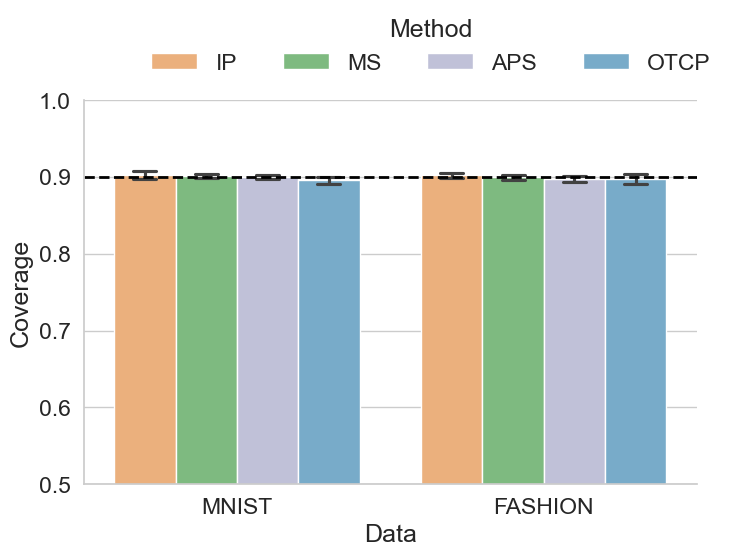

<Figure size 640x480 with 0 Axes>

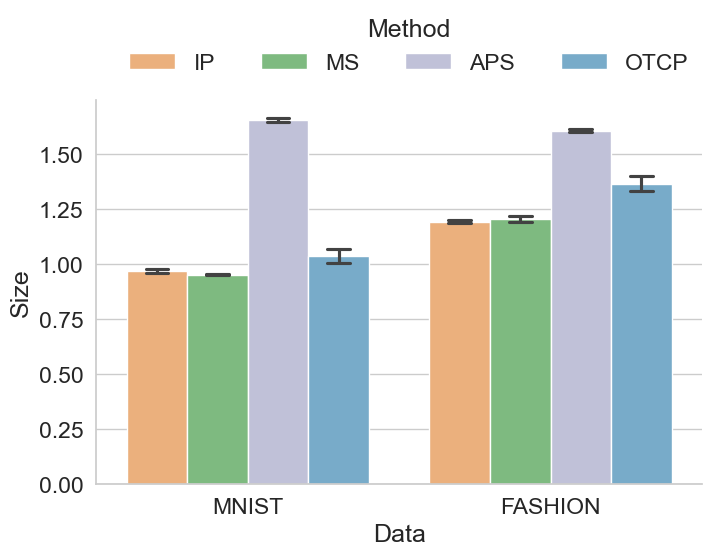

<Figure size 640x480 with 0 Axes>

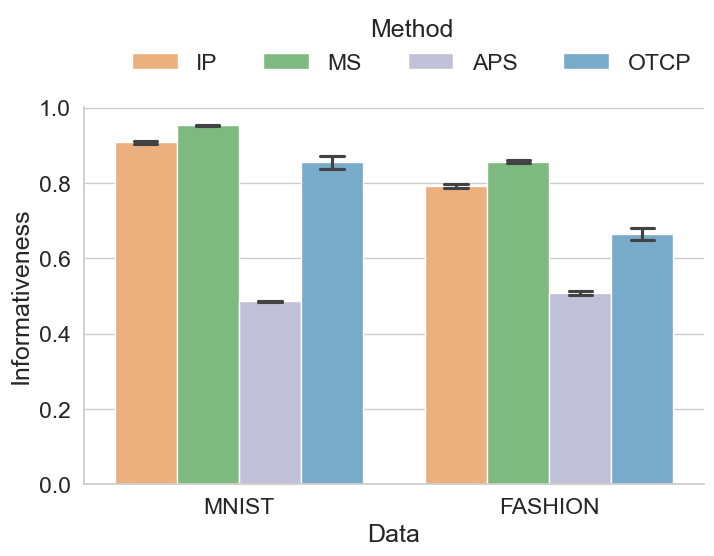

In [17]:
dataset = "mnist"
resultats1 = pd.read_csv('csv/classif_{}_resultatsK10.csv'.format(dataset) ) 
resultats1["Data"]="MNIST"
dataset = "fashion"
resultats2 = pd.read_csv('csv/classif_{}_resultatsK10.csv'.format(dataset) ) 
resultats2["Data"]="FASHION"
resultats = pd.concat([resultats1,resultats2])

sns.set(font_scale=1.5, style="whitegrid" )
############ Coverage:
plt.figure()
g =sns.catplot( 
    data=resultats,  kind="bar",
    x="Data", y="Coverage", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
)   
g.refline(y=alpha, color='black',linestyle="dashed",linewidth=2)
sns.move_legend(g,ncol=4, loc= "upper center",bbox_to_anchor=(0.5,1.15))
plt.ylabel("Coverage") 
plt.ylim(0.5,1)
plt.savefig("Figures/Classif_cond_to_y_Coverage_both.pdf".format(dataset), format="pdf",bbox_inches="tight")
plt.show()
############ Efficiency:
plt.figure()
g = sns.catplot( 
    data=resultats,  kind="bar",
    x="Data", y="Efficiency", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
)   
sns.move_legend(g,ncol=4, loc= "upper center",bbox_to_anchor=(0.5,1.15))
plt.ylabel("Size") 
plt.savefig("Figures/Classif_cond_to_y_Efficiency_both.pdf", format="pdf",bbox_inches="tight")
plt.show()
############ Informativeness:
plt.figure()
g = sns.catplot( 
    data=resultats,  kind="bar",
    x="Data", y="Informativeness", hue="Method", palette=[y2_color,y3_color,y4_color,y1_color],height=5,width=0.8,capsize=0.3,aspect=1.5,hue_order=["IP","MS","APS","OTCP"]
)   
sns.move_legend(g,ncol=4, loc= "upper center",bbox_to_anchor=(0.5,1.15))
plt.ylabel("Informativeness") 
plt.savefig("Figures/Classif_cond_to_y_Informativeness_both.pdf".format(dataset), format="pdf",bbox_inches="tight")
plt.show()
    